# 판다스 퀴즈

## 문제1 merge를 활용한 데이터 병합
두 개의 다른 정보(고객 정보, 구매 정보)가 담긴 데이터프레임을 'CustomerID'를 기준으로 합쳐, 구매 이력이 있는 고객의 이름과 구매 상품을 확인하는 문제입니다.

조건:

df_users와 df_purchases를 'CustomerID' 열을 기준으로 병합합니다.

구매 이력이 있는 고객(즉, 두 데이터프레임에 모두 'CustomerID'가 존재하는)의 데이터만 포함합니다.

최종 결과 데이터프레임을 출력합니다.

In [ ]:
import pandas as pd

# 고객 정보
df_users = pd.DataFrame({
    'CustomerID': [101, 102, 103, 104],
    'Name': ['Alice', 'Bob', 'Charlie', 'David']
})

# 구매 정보
df_purchases = pd.DataFrame({
    'CustomerID': [101, 103, 105],
    'Product': ['Apple', 'Banana', 'Orange']
})

df = pd.merge(df_users, df_purchases, on='CustomerID', how='inner')
df

,CustomerID,Name,Product
0,101,Alice,Apple
1,103,Charlie,Banana


## 문제2 pivot_table을 활용한 데이터 재구조화
여러 지역(Region)과 분기(Quarter)별로 흩어져 있는 판매 데이터를, 각 'Region'을 행(index)으로, 'Quarter'를 열(columns)로 하여 'Sales'의 총합(sum)을 보여주는 피벗 테이블을 생성하는 문제입니다.

조건:

pivot_table 함수를 사용합니다.

행(index)은 'Region'으로 설정합니다.

열(columns)은 'Quarter'로 설정합니다.

값(values)은 'Sales'로 설정합니다.

집계 함수(aggfunc)는 'sum' (합계)을 사용합니다.

결측치(NaN)가 발생할 경우, 0으로 채웁니다.

In [ ]:
import pandas as pd

data = {
    'Region': ['North', 'South', 'North', 'South', 'North', 'South'],
    'Quarter': ['Q1', 'Q1', 'Q2', 'Q1', 'Q2', 'Q2'],
    'Sales': [100, 150, 200, 50, 300, 250]
}
df = pd.DataFrame(data)

df.pivot_table(index = 'Region', columns = 'Quarter', values = 'Sales', aggfunc='sum').fillna(0)

Quarter,Q1,Q2
Region,,
North,100,500
South,200,250


## 문제3 str 접근자 및 astype을 활용한 데이터 클리닝
'Price' 열에 '원'이라는 문자열과 쉼표(,)가 포함되어 있어 문자열(object) 타입으로 저장되어 있습니다. 이 열을 숫자형(int)으로 변환하여 'Price_int'라는 새 열을 만들고, 'Price_int'의 평균을 계산하는 문제입니다.

조건:

'Price' 열에서 '원' 문자열을 제거합니다.

'Price' 열에서 쉼표(,) 문자열을 제거합니다.

공백을 제거합니다.

문자열을 정수타입으로 변환하여 'Price_int' 새 열에 저장합니다.

'Price_int' 열의 평균값을 계산하여 출력합니다.

In [ ]:
import pandas as pd

data = {
    'Item': ['A', 'B', 'C'],
    'Price': [' 1,500 원', '2,000 원 ', ' 1,000 원']
}
df = pd.DataFrame(data)

df['Price'] = df['Price'].str.replace("원","").str.replace(",","").str.strip()
df['Price_int'] = df['Price'].astype(int)
print(df['Price_int'].mean())


1500.0


## 문제4. 이상치, IQR

- 'views' 컬럼의 1사분위수, 3사분위수 그리고 IQR을 계산하시오.
- 이상치 조건에 맞는 데이터를 찾으시오. (이상치는 1사분위수 – (IQR * *1.5)보다 작은 값과 3사분위수 + (IQR* 1.5)보다 큰 값)
- 이상치 데이터의 'views' 컬럼 합을 정수로 구하시오.

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p1/type1_data1.csv")

quan1 = df['views'].quantile(.25)
quan3 = df['views'].quantile(.75)
IQR = quan3 - quan1
cond1 = df['views'] < quan1 - 1.5*IQR
cond2 = df['views'] > quan3 + 1.5*IQR
df = df[cond1|cond2]
print(int(df['views'].sum()))

77699


## 문제5 이상치, 소수점 있는 데이터 찾기, 표준편차

- ‘views’ 컬럼의 표준편차를 구하시오.
- ‘age’ 컬럼의 이상치(소수점 나이, 음수 나이, 0살)를 제거하고, ‘views’ 컬럼의 표준편차를 구하시오.
- 이상치 제거 전후의 ‘views’ 컬럼의 표준편차를 더하여, 반올림 후 소수 둘째 자리까지 구하시오.

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p1/type1_data1.csv")

views_std = df['views'].std()
#print(df['views'].std())
cond1 = df['age'] == round((df['age']),0)
cond2 = df['age'] > 0
df = df[cond1&cond2]
views_std_aft = df['views'].std()
#print(df['views'].std())
print(round(views_std + views_std_aft, 2))

8297.31


## 문제6 데이터(행) 기준 평균값, 인덱싱

- index '2001' 데이터(행)에서 평균보다 큰 값의 개수를 구하시오.
- index '2003' 데이터(행)에서 평균보다 작은 값의 개수를 구하시오.
- 두 개수를 더하시오.

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p1/type1_data2.csv", index_col="year")

df = df.T
#df
a = df[2001].mean()
b = df[2003].mean()
a_len = len(df[df[2001]>a])
b_len = len(df[df[2003]<b])
print(a_len + b_len)

202


## 문제7: groupby와 agg를 이용한 다중 집계
주어진 매장별 판매 데이터에서 'Region' (지역) 별로 그룹화한 뒤, 'Sales' (매출)의 총합(sum)과 'Quantity' (수량)의 평균(mean)을 동시에 계산하는 문제입니다.

조건:

'Region'을 기준으로 데이터를 그룹화합니다.

agg 함수를 사용하여 'Sales'는 합계, 'Quantity'는 평균을 구합니다.

집계 결과를 인덱스가 초기화된 데이터프레임으로 출력합니다. (reset_index 사용

In [1]:
import pandas as pd

data = {
    'Region': ['North', 'South', 'North', 'South', 'East', 'East', 'North'],
    'Item': ['A', 'B', 'A', 'C', 'B', 'A', 'C'],
    'Sales': [150, 200, 180, 220, 300, 120, 100],
    'Quantity': [10, 15, 12, 18, 20, 8, 7]
}
df = pd.DataFrame(data)

df.groupby('Region').agg({'Sales':'sum', 'Quantity':'mean'}).reset_index()

,Region,Sales,Quantity
0,East,420,14.000000
1,North,430,9.666667
2,South,420,16.500000


## 문제8: to_datetime, transform, fillna를 활용한 시계열 및 결측치 처리
주어진 데이터에는 날짜가 문자열로 되어 있고 'Price'에 결측치(NaN)가 있습니다. 'Fruit' 그룹별 평균 가격을 계산하여 결측치를 채우고, 날짜 데이터를 시계열로 변환하여 'Month' 컬럼을 추출하는 문제입니다.

조건:

'Fruit' 컬럼을 기준으로 그룹화합니다.

transform을 사용하여 각 'Fruit' 그룹의 'Price' 평균값을 구합니다.

fillna를 사용해 'Price'의 결측치를 2번에서 구한 그룹별 평균값으로 채웁니다.

'Date' 컬럼을 pd.to_datetime을 사용하여 시계열 데이터로 변환합니다.

시계열 데이터에서 월(month)을 추출하여 'Month'라는 새 컬럼을 만듭니다. (.dt.month 사용)

최종 결과 데이터프레임을 출력합니다.

In [5]:
import pandas as pd
import numpy as np
data = {
    'Date': ['2024-05-15', '2024-05-16', '2024-06-10', '2024-06-11', '2024-07-01', '2024-07-02'],
    'Fruit': ['Apple', 'Banana', 'Apple', 'Banana', 'Apple', 'Banana'],
    'Price': [1500, 800, 1600, np.nan, 1700, np.nan]
}
df = pd.DataFrame(data)

df_mean = df.groupby('Fruit')['Price'].transform('mean')
df['Price'] = df['Price'].fillna(df_mean)
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df

,Date,Fruit,Price,Month
0,2024-05-15,Apple,1500.0,5
1,2024-05-16,Banana,800.0,5
2,2024-06-10,Apple,1600.0,6
3,2024-06-11,Banana,800.0,6
4,2024-07-01,Apple,1700.0,7
5,2024-07-02,Banana,800.0,7


## 문제9 : pivot_table, str 접근자, map을 활용한 데이터 집계 및 변환
주어진 직원 성과 데이터에서 'Department'에 'Sales'가 포함된 부서들만 대상으로 분기별 평균 성과를 피벗 테이블로 만들고, 특정 분기('Q1')의 성과를 기준으로 등급을 매기는 문제입니다.

조건:

'Department' 컬럼에 'Sales'라는 문자열이 포함된 행들만 필터링합니다. (str.contains 사용)

필터링된 데이터를 사용하여, 'Department'를 인덱스(index)로, 'Quarter'를 컬럼(columns)으로, 'Performance'의 평균(mean)을 값(values)으로 하는 피벗 테이블(pivot table)을 생성합니다.

생성된 피벗 테이블에 'Q1_Rank'라는 새 컬럼을 추가합니다.

'Q1_Rank'는 'Q1' 컬럼의 점수를 기준으로, 87점 이상이면 'Excellent', 87점 미만이면 'Good'으로 매핑하여 채웁니다. (map 또는 apply 함수 활용)

In [6]:
import pandas as pd

data = {
    'Employee': ['John Smith', 'Jane Doe', 'Peter Pan', 'Mary Jane', 'John Doe'],
    'Department': ['Sales-A', 'Marketing-B', 'Sales-B', 'Marketing-A', 'Sales-A'],
    'Quarter': ['Q1', 'Q1', 'Q2', 'Q2', 'Q1'],
    'Performance': [85, 90, 78, 92, 88]
}
df = pd.DataFrame(data)

df = df.query('Department.str.contains("Sales")')
df = df.pivot_table(index = 'Department', columns='Quarter', values='Performance', aggfunc='mean')
def mapping(value):
  if value >= 87:
    return 'Excellent'
  else:
    return 'Good'

df['Q1_Rank'] = df['Q1'].apply(mapping)

df

Quarter,Q1,Q2,Q1_Rank
Department,,,
Sales-A,86.5,NaN,Good
Sales-B,NaN,78.0,Good


## 문제10. 결측 데이터 찾기, 필터링, 평균값

- ‘f1’ 컬럼에 결측치가 있는 데이터만 선택하시오.
- 선택된 데이터에서 ‘age’ 컬럼의 평균값을 구하시오. (반올림 후 소수 첫째 자리까지 계산)

In [7]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p1/type1_data1.csv")

#df.shape
cond = df['f1'].isnull()
df = df[cond]
#df.shape
print(round(df['age'].mean(),1))

53.6


## 문제11. 중복데이터 제거, 값 변경, 데이터 개수

- 중복 데이터를 제거하시오. *(단, 중복이 발생한 경우 뒤에 나온 행을 제거한다.)*
- ‘f3’ 컬럼의 결측치는 0, 'silver'는 1, 'gold'는 2, 'vip'는 3으로 변환하시오.
- 변환된 ‘f3’ 컬럼의 총합을 정수형으로 구하시오

In [8]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p1/type1_data1.csv")

#df.shape
df = df.drop_duplicates()
#df.shape
def trans(value):
  if value == "silver":
    return 1
  elif value == "gold":
    return 2
  elif value == "vip":
    return 3
  else:
    return 0
df = df['f3'].apply(trans)
#df
print(int(df.sum()))

167


## 문제12. 컬럼 삭제, 행 단위 합계, 필터링

- 주어진 데이터에서 문자 자료형 컬럼을 삭제하시오.
- 숫자 자료형 컬럼의 결측치를 0으로 대체하시오.
- 각 행의 합이 3000보다 큰 값의 개수를 정수로 구하시오. (각 행의 합: ‘age’ + ‘f1’ + ‘f2’ + ‘f5’ + ‘views’)

In [9]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p1/type1_data1.csv")

#df.info()
df = df.select_dtypes(exclude='object')
#df.info()
df = df.fillna(0)
df = df.T
df = df.sum()
#df
cond = (df > 3000)
df = df[cond]
print(len(df))

88


# 시각화 퀴즈

## 문제1 (Seaborn): 수치형 변수 간의 관계 시각화
tips 데이터셋을 사용하여 'total_bill'(총 계산액)과 'tip'(팁) 사이의 관계를 산점도로 그리되, 'smoker'(흡연 여부)에 따라 색상을 구분하고, 'time'(식사 시간)에 따라 마커 모양을 다르게 표현하세요.

조건:

matplotlib의 subplots를 이용해 fig와 ax 객체를 생성합니다.

x축은 'total_bill', y축은 'tip'으로 설정합니다.

'smoker' 열의 값을 기준으로 점의 색상을 구분합니다.

'time' 열의 값을 기준으로 점의 모양을 구분합니다.

생성된 그래프를 ax에 할당합니다.

<Axes: xlabel='total_bill', ylabel='tip'>

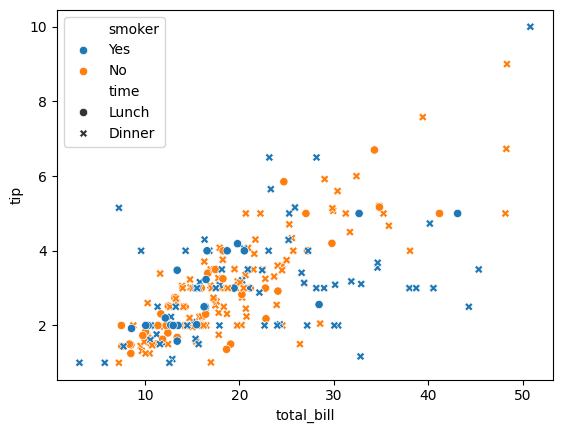

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df = sns.load_dataset('tips')

fig, ax = plt.subplots()
sns.scatterplot(x='total_bill', y='tip', data=df, ax=ax, hue='smoker', style='time')


## 문제2 (Plotly): 시계열 데이터 추세 및 개별 지점 시각화
'No. of Internet Users'(인터넷 사용자 수)가 'Year'(연도)에 따라 어떻게 변하는지 선 그래프로 그리세요. 'Entity'(국가)별로 색상과 선 종류(dash)를 다르게 표현하고, 개별 데이터 지점(marker)도 함께 표시하세요.

조건:

Plotly Express를 사용합니다.

x축은 'Year', y축은 'No. of Internet Users'로 설정합니다.

'Entity' 열의 값을 기준으로 선의 색상을 구분합니다.

'Entity' 열의 값을 기준으로 선의 종류(dash style)를 구분합니다.

'Entity' 열의 값을 기준으로 마커(symbol)도 표시합니다.

In [ ]:
import pandas as pd
import plotly.express as px

# 샘플 데이터 (학습 노트의 데이터 예시)
data = {
    'Year': [2000, 2005, 2010, 2000, 2005, 2010, 2000, 2005, 2010],
    'Entity': ['China', 'China', 'China', 'India', 'India', 'India', 'Finland', 'Finland', 'Finland'],
    'No. of Internet Users': [22, 110, 450, 5, 40, 200, 1, 2, 4]
}
df = pd.DataFrame(data)

fig = px.line(data_frame = df, x='Year', y='No. of Internet Users', width=400, height=400, color='Entity', line_dash='Entity', symbol='Entity')
fig.show()

## 문제 3 (Plotly): 회귀선이 포함된 산점도
tips 데이터셋을 사용하여 'total_bill'과 'tip'의 관계를 산점도로 그리되, 'smoker'(흡연 여부) 그룹별로 다른 색상의 점과 별도의 회귀선을 표시하세요.

조건:

Plotly Express를 사용합니다.

x축은 'total_bill', y축은 'tip'으로 설정합니다.

'smoker' 열의 값을 기준으로 점의 색상을 구분합니다.

선형 회귀선(OLS)을 그래프에 추가해야 합니다. (그룹별로 자동 적용되어야 함)

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns # 데이터 로드용

# 데이터 로드
df = sns.load_dataset('tips')

fig = px.scatter(data_frame=df, x='total_bill', y='tip', color='smoker', trendline='ols')
fig.show()